In [35]:
#  MNIST tutorial (handwritten printed digits recognition tutorial)
#  modified from
#  https://elitedatascience.com/keras-tutorial-deep-learning-in-python
#  for SDSC SI2017
# 
# note, hit >| to run, if an asterik is shown in the In[*] prompt you can interrupt the 
#       running process by selecting Kernel-> interrupt

# ----------- IMPORT STATEMENTS ---------------
import numpy as np
np.random.seed(1)  # for reproducibility
import time
import matplotlib.pyplot as plt      #These provide matlab type of plotting functions
import matplotlib.image as mpimg

from keras.models import Sequential               #Sequential models are the standard stack of layers models
from keras.layers import Dense, Dropout, Activation, Flatten   #These are core layer specification functions
from keras.layers import Convolution2D, MaxPooling2D           #These are convolution layer functions
from keras.utils import np_utils                         #Some utilities
from keras import optimizers                             #For training algorithm
#---------------------------------------------
print('import done')
print (time.strftime("%H:%M:%S"))

import done
04:55:55


(5000, 28, 28)


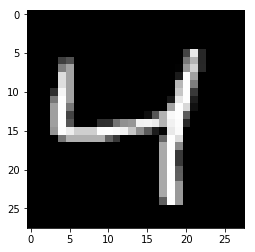

img load done
04:56:34


In [38]:
#--------------- LOAD and PREPARE DATA STATEMENTS ----------------
# Load some numpy arrays that have the MNIST data
#  (these are subsets extracted from the MNIST data set in Keras)
X_train=np.load('X_train5k.npy')
Y_train=np.load('Y_train5k.npy')
X_test =np.load('X_test.npy')
Y_test =np.load('Y_test.npy')

print(X_train.shape)     #review the dimensions Note python3 uses print(X..) python 2 uses print X...

#save a few training images with the label in the file name 
from PIL import Image
for i in range(0,3):
   im = Image.fromarray(X_train[i,:,:])
   im.save("Xtrain_num"+str(i)+"_cat_"+str(Y_train[i])+".jpeg")

plt.figure()
plt.imshow(im,'gray')
plt.show()
    
print('img load done')
print (time.strftime("%H:%M:%S"))

In [36]:
plt.figure()

In [39]:
# --------- Reshape input data ------------
#  b/c Keras expects N-3D images (ie 4D matrix)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test  = X_test.reshape(X_test.shape[0],   1, 28, 28)

#To confirm, we can print X_train's dimensions again:
print(X_train.shape)

#convert and put into 0-1 range
X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')
X_train /= 255
X_test  /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test  = np_utils.to_categorical(Y_test,  10)

# ------------- End loading and preparing data --------------
np.amax(X_train)   #this gets the max value over a flattened numpy array
print('prep done')
print (time.strftime("%H:%M:%S"))

(5000, 1, 28, 28)
prep done
04:56:47


In [50]:
# --------------Set up Model ---------------------
mymodel = Sequential()

numfilters = 16
#add convolution layer of 32 or 16 or __ filters, 3x3 each, 
#     input shape for 1 image, channels refers to color dimension of input image
mymodel.add(Convolution2D(numfilters, (3,3),strides=1,  data_format="channels_first",activation='relu', input_shape=(1,28,28))) 
 
    
print('modeldef and first conv layer done')
print (time.strftime("%H:%M:%S"))

modeldef and first conv layer done
05:00:36


In [51]:
mymodel.layers[0].output # use this to check sizes of output  

<tf.Tensor 'conv2d_8/Relu:0' shape=(?, 16, 20, 20) dtype=float32>

In [52]:
#-----------------Now add more Convolution layers
mymodel.add(Convolution2D(numfilters, (3, 3), activation='relu'))
mymodel.add(MaxPooling2D(pool_size=(2,2))) #get Max over 2D region,and slide
#mymodel.layers[2].output   #size of output layer for max pooling

#optional: try running with and without Dropout
mymodel.add(Dropout(0.25))
 
mymodel.add(Flatten())            #reorganize 2DxFilters output into 1D
print('done adding 2nd conv layer')
print (time.strftime("%H:%M:%S"))

done adding 2nd conv layer
05:00:43


In [53]:
#----------------Now add final classification layers
mymodel.add(Dense(128, activation='relu'))  #enter number of hidden units (no good rule, but start with ~ num of previous output) 
mymodel.add(Dropout(0.5))
mymodel.add(Dense(10, activation='softmax'))
print('assemble model done')
print (time.strftime("%H:%M:%S"))

assemble model done
05:00:45


In [54]:
# --------- Now assemble (ie compile TensorFlow commands) and run -----
mymodel.compile(loss='categorical_crossentropy',
               optimizer='adam',     # another option is 'sgd' 
               metrics=['accuracy'])
print('compile model done')
print (time.strftime("%H:%M:%S"))

compile model done
05:00:47


In [55]:
#------------ Now Run Training
mymodel.fit(X_train, Y_train, validation_split=0.0, validation_data=(X_test,Y_test), 
          batch_size=32, epochs=10, verbose=1)  #batch up 32 examples before adjusting weights,
                                                #sweep through training data 'epochs' times
print('model training')
print (time.strftime("%H:%M:%S"))

Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 3s - loss: 1.0188 - acc: 0.6644 - val_loss: 0.3279 - val_acc: 0.9105
Epoch 2/10
5000/5000 [==============================] - 3s - loss: 0.3718 - acc: 0.8864 - val_loss: 0.1955 - val_acc: 0.9420
Epoch 3/10
5000/5000 [==============================] - 3s - loss: 0.2589 - acc: 0.9278 - val_loss: 0.1645 - val_acc: 0.9481
Epoch 4/10
5000/5000 [==============================] - 3s - loss: 0.2245 - acc: 0.9370 - val_loss: 0.1348 - val_acc: 0.9570
Epoch 5/10
5000/5000 [==============================] - 3s - loss: 0.1813 - acc: 0.9460 - val_loss: 0.1301 - val_acc: 0.9582
Epoch 6/10
5000/5000 [==============================] - 3s - loss: 0.1527 - acc: 0.9538 - val_loss: 0.1181 - val_acc: 0.9625
Epoch 7/10
5000/5000 [==============================] - 3s - loss: 0.1438 - acc: 0.9580 - val_loss: 0.1118 - val_acc: 0.9640
Epoch 8/10
5000/5000 [==============================] - 3s - loss: 0.1176 - 

In [56]:
#--------- Get overall prediction score
trainscore = mymodel.evaluate(X_train, Y_train, verbose=1) # get overal score
testscore  = mymodel.evaluate(X_test, Y_test, verbose=1) # get overal score
#somepred  = mymodel.predict(X_test,verbose=0)           # get predicted labels
print(trainscore)
print(testscore)
print('evaluate scores')
print (time.strftime("%H:%M:%S"))

 9824/10000 [============================>.] - ETA: 0s[0.033213917306065557, 0.98980000000000001]
[0.10348277954841033, 0.96640000000000004]
evaluate scores
05:01:39


4.0


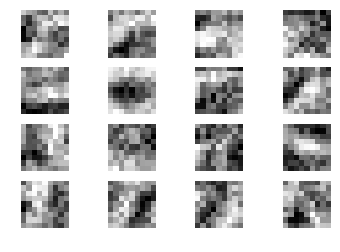

done plotting weights mosaic


In [57]:
# ------------ GET WEIGHTS From Convolution Layer and make mosaic image 
Wlist   =mymodel.layers[0].get_weights()
W3D     =np.squeeze(Wlist[0])
W3D.shape
W3Dchan =W3D.swapaxes(1,2).swapaxes(0,1)  #get 32 as 1st dimension

Wmin       =np.amin(W3Dchan)
Wmax       =np.amax(W3Dchan-Wmin)
Wsc        =np.int_(255*(W3Dchan-Wmin)/Wmax)
ncol =4
nrow =np.ceil(numfilters/ncol)
print(nrow)
plt.figure()
for i in range(Wsc.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(Wsc[i],'gray')
   plt.axis('off')
#plt.savefig("test.png", bbox_inches='tight')
plt.show()
print('done plotting weights mosaic')

In [58]:
#  ---------------- NOW Visualize the activations for the first training example --------
from keras import backend as K    #backend is tensorflow

get_layer_output = K.function([mymodel.layers[0].input],[mymodel.layers[0].output]) #set up function
x                = np.expand_dims(X_train[0],0)           #set up a 4D input of 1 image training set 
layer_output     = get_layer_output([x])[0]  #get output using K.function

layer_output.shape    #check output shape and use it in next cell, first dimension is number of filters

print('getting output shape')
print (time.strftime("%H:%M:%S"))

getting output shape
05:02:00


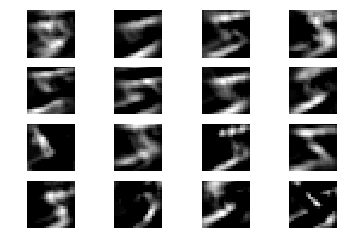

done plotting layer activation output mosaic
05:02:04


In [59]:
# --- Now output a mosaic
layeroutput3D      = np.squeeze(layer_output)      
ncol =4
nrow =np.ceil(numfilters/ncol)
plt.figure()
for i in range(layeroutput3D.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(layeroutput3D[i],'gray')
   plt.axis('off')
#plt.savefig("test.png", bbox_inches='tight')
plt.show()
print('done plotting layer activation output mosaic')
print (time.strftime("%H:%M:%S"))